# Predicción de Precios de Energía 2018
### Proyecto final Programación Avanzada

Autores: 

Omar Antonio Madriz Almanza 

José Luis Torrentera Arróniz

## Regresión Lineal (Con Zona)

Librerías usadas: pandas, sklearn y matplotlib

In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Lectura de archivos csv a dataframes

In [4]:
df2017 = pd.read_csv("Datos2017.csv", engine='python')
df2018 = pd.read_csv("Datos2018.csv", engine = 'python')
df2017.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
0,01/01/2017,1,ACAPULCO,1010.09,640.92,77.38,291.79
1,01/01/2017,2,ACAPULCO,809.93,724.95,84.98,0.00
2,01/01/2017,3,ACAPULCO,707.82,638.03,69.79,0.00
3,01/01/2017,4,ACAPULCO,675.76,612.79,62.97,0.00
4,01/01/2017,5,ACAPULCO,659.99,600.75,59.25,0.00


In [5]:
df2018.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
0,01/01/2018,1,ACAPULCO,685.78,620.61,65.17,0.0
1,01/01/2018,2,ACAPULCO,656.15,598.67,57.48,0.0
2,01/01/2018,3,ACAPULCO,648.10,593.70,54.40,0.0
3,01/01/2018,4,ACAPULCO,622.45,572.44,50.01,0.0
4,01/01/2018,5,ACAPULCO,585.41,541.02,44.40,0.0


Filtrado por zona

In [6]:
zona = 'ZAMORA'
dfZona17 = df2017[df2017['Zona de Carga'].isin([zona])]
dfZona18 = df2018[df2018['Zona de Carga'].isin([zona])]
dfZona17.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
2352,01/01/2017,1,ZAMORA,750.18,640.92,19.07,90.19
2353,01/01/2017,2,ZAMORA,744.36,724.95,19.41,0.00
2354,01/01/2017,3,ZAMORA,654.01,638.03,15.98,0.00
2355,01/01/2017,4,ZAMORA,628.52,612.79,15.73,0.00
2356,01/01/2017,5,ZAMORA,614.05,600.75,13.30,0.00


In [7]:
dfZona18.head()

,Fecha,Hora,Zona de Carga,Precio Zonal ($/MWh),Componente energia ($/MWh),Componente perdidas ($/MWh),Componente Congestion ($/MWh)
2352,01/01/2018,1,ZAMORA,645.20,620.61,24.59,0.0
2353,01/01/2018,2,ZAMORA,618.09,598.67,19.42,0.0
2354,01/01/2018,3,ZAMORA,612.78,593.70,19.08,0.0
2355,01/01/2018,4,ZAMORA,589.45,572.44,17.01,0.0
2356,01/01/2018,5,ZAMORA,553.87,541.02,12.85,0.0


Filtramos sólo las columnas que necesitamos

In [8]:
dfFilt17 = dfZona17[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFilt18 = dfZona18[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFilt17.head()

,Fecha,Hora,Precio Zonal ($/MWh)
2352,01/01/2017,1,750.18
2353,01/01/2017,2,744.36
2354,01/01/2017,3,654.01
2355,01/01/2017,4,628.52
2356,01/01/2017,5,614.05


In [9]:
dfFilt18.head()

,Fecha,Hora,Precio Zonal ($/MWh)
2352,01/01/2018,1,645.20
2353,01/01/2018,2,618.09
2354,01/01/2018,3,612.78
2355,01/01/2018,4,589.45
2356,01/01/2018,5,553.87


Valores de entrenamiento y de test (para entrenamiento se utilizo la tabla de 2017 y para test la de 2018)

In [10]:
df_x_train = dfFilt17[['Hora']]
df_y_train = dfFilt17[['Precio Zonal  ($/MWh)']]

df_x_test = dfFilt18[['Hora']]
df_y_test = dfFilt18[['Precio Zonal  ($/MWh)']]

Regresión Lineal

In [12]:
regr = linear_model.LinearRegression()
regr.fit(df_x_train, df_y_train)
df_y_pred = regr.predict(df_x_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[26.77172132]]
Mean squared error: 711461.54
Variance score: -0.26


Gráfica resultante

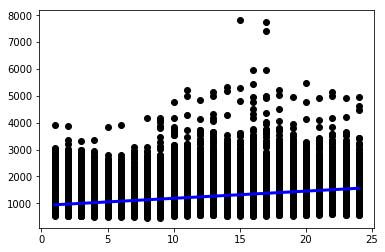

In [13]:
plt.scatter(df_x_test, df_y_test,  color='black')
plt.plot(df_x_test, df_y_pred, color='blue', linewidth=3)
plt.show()

Boxplot del precio zonal y la hora.

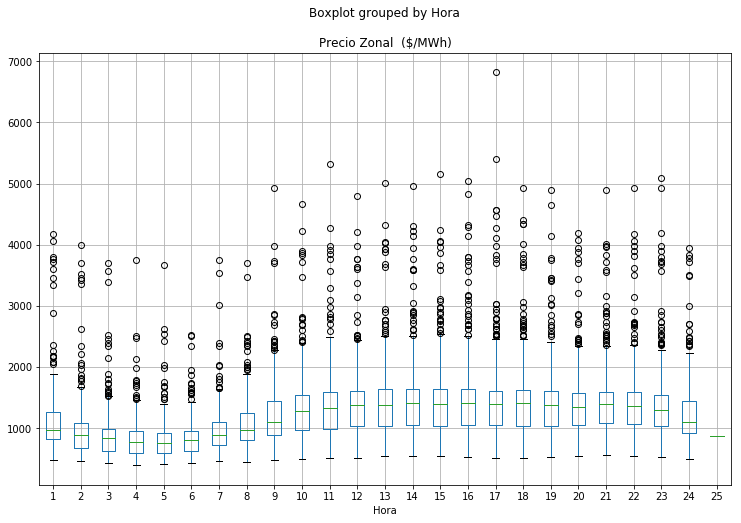

In [14]:
data = dfFilt17
data.boxplot('Precio Zonal  ($/MWh)', by= 'Hora', figsize=(12,8))

plt.show()

## Regresión Lineal (Sin zona)

Se realiza una nueva lectura de los datos para tratar de evitar errores.

In [15]:
dfL2017 = pd.read_csv("Datos2017.csv", engine='python')
dfL2018 = pd.read_csv("Datos2018.csv", engine = 'python')

Se filtran las columnas que corresponden a las variables dependientes e independientes.

In [17]:
dfLFilt17 = df2017[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfLFilt18 = df2018[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfLFilt17.head()

,Fecha,Hora,Precio Zonal ($/MWh)
0,01/01/2017,1,1010.09
1,01/01/2017,2,809.93
2,01/01/2017,3,707.82
3,01/01/2017,4,675.76
4,01/01/2017,5,659.99


In [18]:
dfLFilt18.head()

,Fecha,Hora,Precio Zonal ($/MWh)
0,01/01/2018,1,685.78
1,01/01/2018,2,656.15
2,01/01/2018,3,648.10
3,01/01/2018,4,622.45
4,01/01/2018,5,585.41


Selección de los conjuntos de entrenamiento y prueba. En donde se entrenará con los datos del 2017 y se prueba con 2018.

In [21]:
df_x_train = dfLFilt17[['Hora']]
df_y_train = dfLFilt17[['Precio Zonal  ($/MWh)']]

df_x_test = dfLFilt18[['Hora']]
df_y_test = dfLFilt18[['Precio Zonal  ($/MWh)']]

Regresión lineal: 

In [22]:
regr = linear_model.LinearRegression()
regr.fit(df_x_train, df_y_train)
df_y_pred = regr.predict(df_x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))

Coefficients: 
 [[26.80521144]]
Mean squared error: 1078372.41
Variance score: -0.20


Resultando en la siguientes gráficas: 

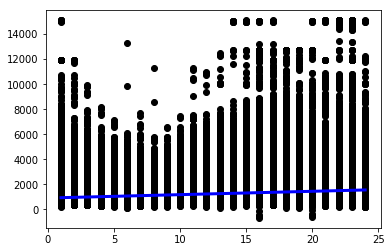

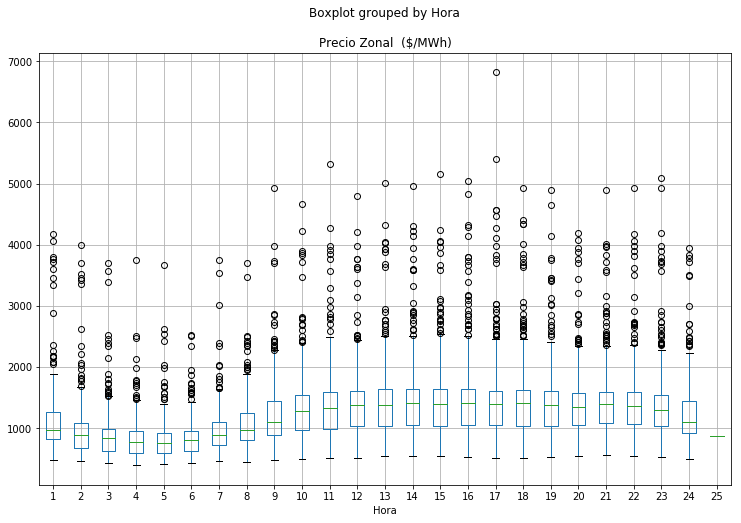

In [23]:
# Plot outputs
plt.scatter(df_x_test, df_y_test,  color='black')
plt.plot(df_x_test, df_y_pred, color='blue', linewidth=3)
plt.show()

#graficar box plot
data = dfFilt17
data.boxplot('Precio Zonal  ($/MWh)', by= 'Hora', figsize=(12,8))

## Regresión Multivariable Con Zona (Hora y Día)

Librerías necesarias

In [36]:
from datetime import date
from datetime import datetime as dt
import statsmodels.api as sm

Nueva lectura de datos

In [24]:
df2017m2 = pd.read_csv("Datos2017.csv", engine='python')
df2018m2 = pd.read_csv("Datos2018.csv", engine = 'python')

Se concatenaron las tablas para no estar manejando todo el doble.

In [27]:
frames = [df2017, df2018]
df1718m2 = pd.concat(frames)

Filtrado de los datos por zona y columnas que necesitamos

In [28]:
zona = 'ZAMORA'
dfZona1718m2 = df1718m2[df1718['Zona de Carga'].isin([zona])]

dfFiltm2 = dfZona1718m2[['Fecha','Hora', 'Precio Zonal  ($/MWh)']]
dfFiltm2.head()

,Fecha,Hora,Precio Zonal ($/MWh)
2352,01/01/2017,1,750.18
2353,01/01/2017,2,744.36
2354,01/01/2017,3,654.01
2355,01/01/2017,4,628.52
2356,01/01/2017,5,614.05


Añadimos los valores de días a la tabla para hacer la regresión. Reseteamos los indices para no tener problemas después de la concatenación de la tabla.

In [31]:
dfFiltm2 = dfFiltm2.reset_index(drop= True)
dia=[] #serie donde coloco todo lo que voy a adicionar en la columna

for index,row in dfFiltm2.iterrows():
    dia.append(date.isoweekday(dt.strptime(row['Fecha'],'%d/%m/%Y')))
#https://pandas.pydata.org/pandas-docs/stable/merging.html
sdia=pd.Series(dia, name='Dia') 
dfFiltm2 = pd.concat([dfFiltm2, sdia], axis=1)
dfFiltm2.head()

,Fecha,Hora,Precio Zonal ($/MWh),Dia
0,01/01/2017,1,750.18,7
1,01/01/2017,2,744.36,7
2,01/01/2017,3,654.01,7
3,01/01/2017,4,628.52,7
4,01/01/2017,5,614.05,7


Selección de datos para entrenamiento y testing

In [32]:
df_xm2 = dfFiltm2[['Hora', 'Dia']]
df_ym2 = dfFiltm2[['Precio Zonal  ($/MWh)']]

df_x_trainm2 = df_xm2[:8760]
df_x_testm2 = df_xm2[8760:]

df_y_trainm2 = df_ym2[:8760]
df_y_testm2 = df_ym2[8760:]

regr = linear_model.LinearRegression()
regr.fit(df_x_trainm2, df_y_trainm2)
df_y_predm2 = regr.predict(df_x_testm2)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_testm2, df_y_predm2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_testm2, df_y_predm2))

Coefficients: 
 [[ 26.77205889 -47.36503495]]
Mean squared error: 691395.85
Variance score: -0.22


Gráfica resultante

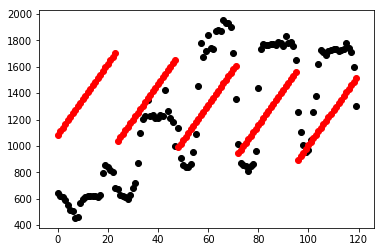

In [34]:
plt.scatter(range(0,120), df_y_testm2[:120], color = 'black')
plt.scatter(range(0,120), df_y_predm2[:120], color = 'red')
plt.show()

Usando la librería de statsmodels

In [41]:
df_x_trainm2 = sm.add_constant(df_x_trainm2)
df_x_testm2 = sm.add_constant(df_x_testm2)

model = sm.OLS(df_y_trainm2, df_x_trainm2).fit()
predictions = model.predict(df_x_testm2)

summ = model.summary()
print(summ)

                              OLS Regression Results                             
Dep. Variable:     Precio Zonal  ($/MWh)   R-squared:                       0.123
Model:                               OLS   Adj. R-squared:                  0.123
Method:                    Least Squares   F-statistic:                     613.9
Date:                   Mon, 26 Nov 2018   Prob (F-statistic):          3.03e-250
Time:                           14:35:45   Log-Likelihood:                -67800.
No. Observations:                   8760   AIC:                         1.356e+05
Df Residuals:                       8757   BIC:                         1.356e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1106.3401 